In [1]:
import numpy as np
import random
import networkx as nx
from IPython.display import Image
import matplotlib.pyplot as plt

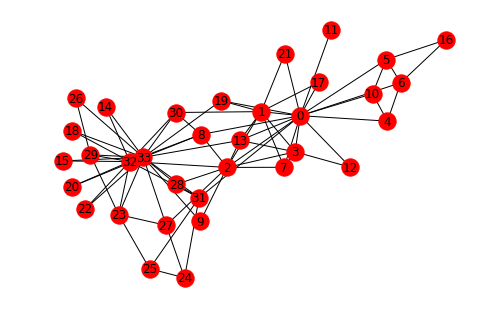

In [7]:
# Load the graph
G_karate = nx.karate_club_graph()
# Find key-values for the graph
pos = nx.spring_layout(G_karate)
# Plot the graph
nx.draw(G_karate, cmap = plt.get_cmap('rainbow'), with_labels=True, pos=pos)

In [8]:
n=34

G_karate.degree()

DegreeView({0: 16, 1: 9, 2: 10, 3: 6, 4: 3, 5: 4, 6: 4, 7: 4, 8: 5, 9: 2, 10: 3, 11: 1, 12: 2, 13: 5, 14: 2, 15: 2, 16: 2, 17: 2, 18: 2, 19: 3, 20: 2, 21: 2, 22: 2, 23: 5, 24: 3, 25: 3, 26: 2, 27: 4, 28: 3, 29: 4, 30: 4, 31: 6, 32: 12, 33: 17})

In [11]:
# Isolate the sequence of degrees
degree_sequence = list(G_karate.degree())
degree_sequence[:5]

[(0, 16), (1, 9), (2, 10), (3, 6), (4, 3)]

In [12]:
nb_nodes = n
nb_arr = len(G_karate.edges())

avg_degree = np.mean(np.array(degree_sequence)[:,1])
med_degree = np.median(np.array(degree_sequence)[:,1])

max_degree = max(np.array(degree_sequence)[:,1])
min_degree = np.min(np.array(degree_sequence)[:,1])

In [13]:
print("Number of nodes : " + str(nb_nodes))
print("Number of edges : " + str(nb_arr))

print("Maximum degree : " + str(max_degree))
print("Minimum degree : " + str(min_degree))

print("Average degree : " + str(avg_degree))
print("Median degree : " + str(med_degree))

Number of nodes : 34
Number of edges : 78
Maximum degree : 17
Minimum degree : 1
Average degree : 4.588235294117647
Median degree : 3.0


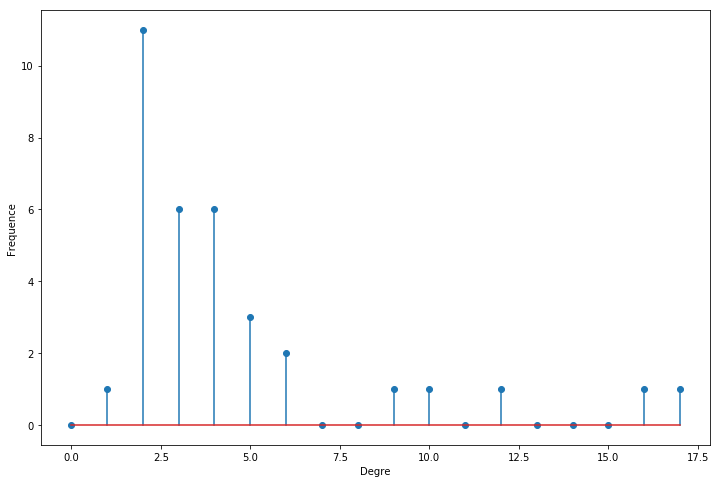

In [14]:
degree_freq = np.array(nx.degree_histogram(G_karate)).astype('float')

plt.figure(figsize=(12, 8))
plt.stem(degree_freq)
plt.ylabel("Frequence")
plt.xlabel("Degre")
plt.show()

## 2、常用的图类型

### 2.1 Erdos-Rényi 模型

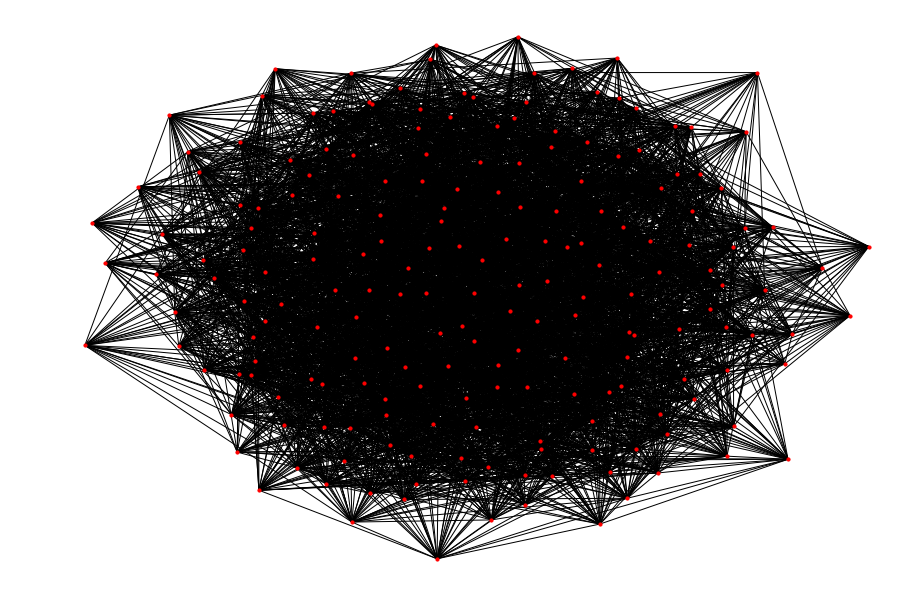

In [18]:
# Generate the graph
n = 200
p = 0.2
G_erdos = nx.erdos_renyi_graph(n, p, seed =100)

# Plot the graph
plt.figure(figsize=(12,8))
nx.draw(G_erdos, node_size=10)

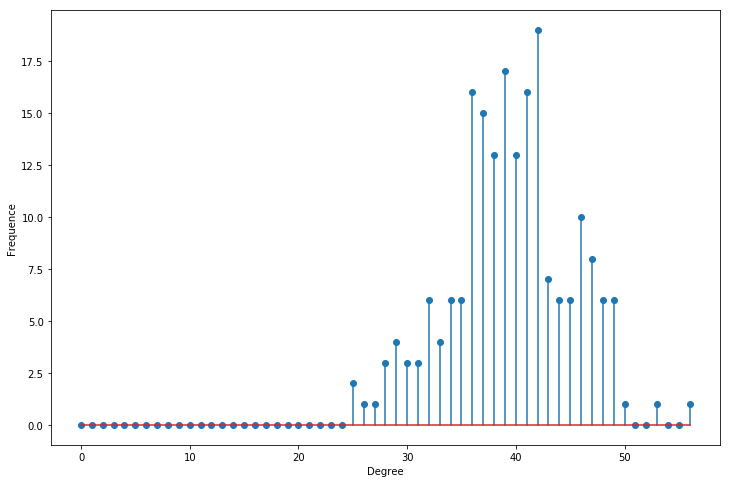

In [19]:
degree_freq = np.array(nx.degree_histogram(G_erdos)).astype('float')

plt.figure(figsize=(12, 8))
plt.stem(degree_freq)
plt.ylabel("Frequence")
plt.xlabel("Degree")
plt.show()

In [20]:
# Get the list of the degrees
degree_sequence_erdos = list(G_erdos.degree())

nb_nodes = n
nb_arr = len(G_erdos.edges())

avg_degree = np.mean(np.array(degree_sequence_erdos)[:,1])
med_degree = np.median(np.array(degree_sequence_erdos)[:,1])

max_degree = max(np.array(degree_sequence_erdos)[:,1])
min_degree = np.min(np.array(degree_sequence_erdos)[:,1])

esp_degree = (n-1)*p

print("Number of nodes : " + str(nb_nodes))
print("Number of edges : " + str(nb_arr))

print("Maximum degree : " + str(max_degree))
print("Minimum degree : " + str(min_degree))

print("Average degree : " + str(avg_degree))
print("Expected degree : " + str(esp_degree))
print("Median degree : " + str(med_degree))

Number of nodes : 200
Number of edges : 3949
Maximum degree : 56
Minimum degree : 25
Average degree : 39.49
Expected degree : 39.800000000000004
Median degree : 39.5


### 2.2 Barabasi-Albert 模型

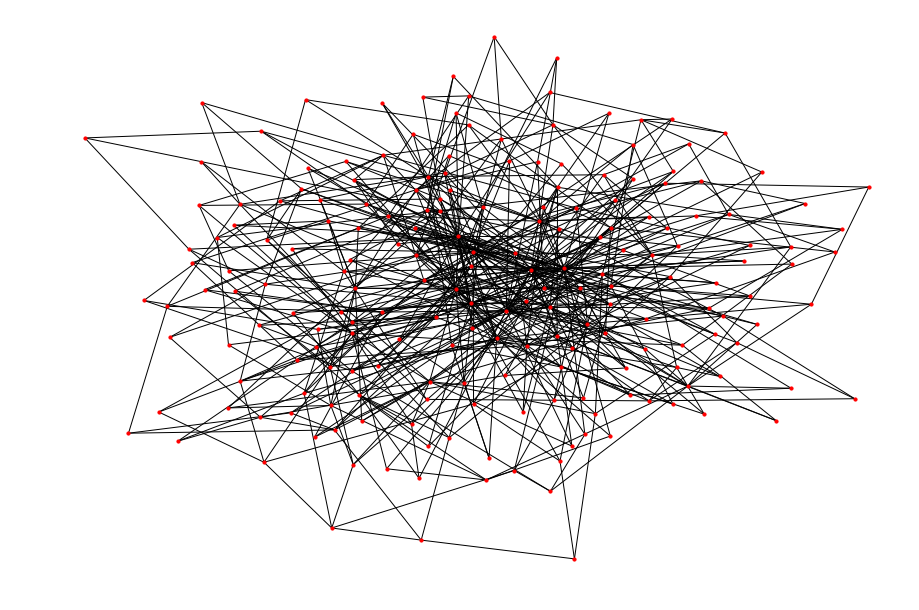

In [24]:
# Generate the graph
n = 200
m = 3
G_barabasi = nx.barabasi_albert_graph(n,m)
# Plot the graph
plt.figure(figsize=(12,8))
nx.draw(G_barabasi, node_size=10)

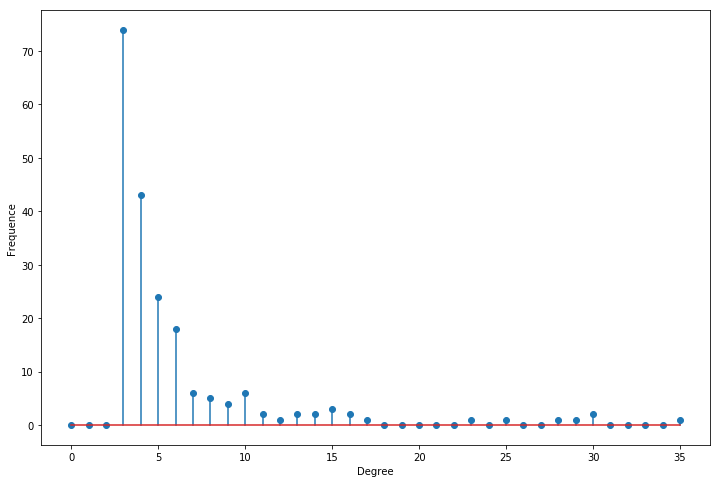

In [25]:
degree_freq = np.array(nx.degree_histogram(G_barabasi)).astype('float')
plt.figure(figsize=(12, 8))
plt.stem(degree_freq)
plt.ylabel("Frequence")
plt.xlabel("Degree")
plt.show()

In [26]:
# Get the list of the degrees
degree_sequence_erdos = list(G_erdos.degree())

nb_nodes = n
nb_arr = len(G_erdos.edges())

avg_degree = np.mean(np.array(degree_sequence_erdos)[:,1])
med_degree = np.median(np.array(degree_sequence_erdos)[:,1])

max_degree = max(np.array(degree_sequence_erdos)[:,1])
min_degree = np.min(np.array(degree_sequence_erdos)[:,1])

esp_degree = (n-1)*p

print("Number of nodes : " + str(nb_nodes))
print("Number of edges : " + str(nb_arr))

print("Maximum degree : " + str(max_degree))
print("Minimum degree : " + str(min_degree))

print("Average degree : " + str(avg_degree))
print("Expected degree : " + str(esp_degree))
print("Median degree : " + str(med_degree))

Number of nodes : 200
Number of edges : 3949
Maximum degree : 56
Minimum degree : 25
Average degree : 39.49
Expected degree : 39.800000000000004
Median degree : 39.5


## 3、图算法

- 寻路算法是通过最小化跳（hop）的数量来寻找两个节点之间的最短路径。

- 搜索算法不是给出最短路径，而是根据图的相邻情况或深度来探索图。这可用于信息检索。

### 3.1 寻路和图搜索算法

图搜索算法主要有两种：

- 广度优先搜索（BFS）：首先探索每个节点的相邻节点，然后探索相邻节点的相邻节点。-> 层次遍历

- 深度优先搜索（DFS）：会尝试尽可能地深入一条路径，如有可能便访问新的相邻节点。-> 先序遍历

### 3.2 寻路算法

#### 3.2.1 最短路径


最短路径计算的是一对节点之间的最短的加权（如果图有加权的话）路径。


In [27]:
# Returns shortest path between each node
nx.shortest_path(G_karate)

{0: {0: [0],
  1: [0, 1],
  2: [0, 2],
  3: [0, 3],
  4: [0, 4],
  5: [0, 5],
  6: [0, 6],
  7: [0, 7],
  8: [0, 8],
  10: [0, 10],
  11: [0, 11],
  12: [0, 12],
  13: [0, 13],
  17: [0, 17],
  19: [0, 19],
  21: [0, 21],
  31: [0, 31],
  30: [0, 1, 30],
  9: [0, 2, 9],
  27: [0, 2, 27],
  28: [0, 2, 28],
  32: [0, 2, 32],
  16: [0, 5, 16],
  33: [0, 8, 33],
  24: [0, 31, 24],
  25: [0, 31, 25],
  23: [0, 2, 27, 23],
  14: [0, 2, 32, 14],
  15: [0, 2, 32, 15],
  18: [0, 2, 32, 18],
  20: [0, 2, 32, 20],
  22: [0, 2, 32, 22],
  29: [0, 2, 32, 29],
  26: [0, 8, 33, 26]},
 1: {1: [1],
  0: [1, 0],
  2: [1, 2],
  3: [1, 3],
  7: [1, 7],
  13: [1, 13],
  17: [1, 17],
  19: [1, 19],
  21: [1, 21],
  30: [1, 30],
  4: [1, 0, 4],
  5: [1, 0, 5],
  6: [1, 0, 6],
  8: [1, 0, 8],
  10: [1, 0, 10],
  11: [1, 0, 11],
  12: [1, 0, 12],
  31: [1, 0, 31],
  9: [1, 2, 9],
  27: [1, 2, 27],
  28: [1, 2, 28],
  32: [1, 2, 32],
  33: [1, 13, 33],
  16: [1, 0, 5, 16],
  24: [1, 0, 31, 24],
  25: [1, 0, 31,

#### 3.2.2 单源最短路径


单源最短路径（Single Source Shortest Path/SSSP）是找到给定节点与图中其它所有节点之间的最短路径。


这常用于 IP 网络的路由协议。


#### 3.2.3 所有配对最短路径


所有配对最短路径（All Pairs Shortest Path / APSP）算法是找到所有节点对之间的最短路径。


尽管能够提供相近的结果，但这比为每个节点对调用单源最短路径算法更快。该算法通常可用于确定交通网格的不同分区的流量负载。

In [28]:
# Returns shortest path length between each node
list(nx.all_pairs_shortest_path_length(G_karate))

[(0,
  {0: 0,
   1: 1,
   2: 1,
   3: 1,
   4: 1,
   5: 1,
   6: 1,
   7: 1,
   8: 1,
   10: 1,
   11: 1,
   12: 1,
   13: 1,
   17: 1,
   19: 1,
   21: 1,
   31: 1,
   30: 2,
   9: 2,
   27: 2,
   28: 2,
   32: 2,
   16: 2,
   33: 2,
   24: 2,
   25: 2,
   23: 3,
   14: 3,
   15: 3,
   18: 3,
   20: 3,
   22: 3,
   29: 3,
   26: 3}),
 (1,
  {1: 0,
   0: 1,
   2: 1,
   3: 1,
   7: 1,
   13: 1,
   17: 1,
   19: 1,
   21: 1,
   30: 1,
   4: 2,
   5: 2,
   6: 2,
   8: 2,
   10: 2,
   11: 2,
   12: 2,
   31: 2,
   9: 2,
   27: 2,
   28: 2,
   32: 2,
   33: 2,
   16: 3,
   24: 3,
   25: 3,
   23: 3,
   14: 3,
   15: 3,
   18: 3,
   20: 3,
   22: 3,
   29: 3,
   26: 3}),
 (2,
  {2: 0,
   0: 1,
   1: 1,
   3: 1,
   7: 1,
   8: 1,
   9: 1,
   13: 1,
   27: 1,
   28: 1,
   32: 1,
   4: 2,
   5: 2,
   6: 2,
   10: 2,
   11: 2,
   12: 2,
   17: 2,
   19: 2,
   21: 2,
   31: 2,
   30: 2,
   33: 2,
   23: 2,
   24: 2,
   14: 2,
   15: 2,
   18: 2,
   20: 2,
   22: 2,
   29: 2,
   16: 3,
   25: 3,
 

#### 3.2.4 最小权重生成树


最小权重生成树（minimum spanning tree）是图（一个树）的一个子图，其用权重和最小的边连接了图中的所有节点。


最小生成树应该用于无向图。

In [29]:
from networkx.algorithms import tree
mst = tree.minimum_spanning_edges(G_karate, algorithm='prim', data=False)
edgelist = list(mst)
sorted(edgelist)

[(0, 1),
 (0, 2),
 (0, 3),
 (0, 4),
 (0, 5),
 (0, 6),
 (0, 7),
 (0, 8),
 (0, 10),
 (0, 11),
 (0, 12),
 (0, 13),
 (0, 17),
 (0, 19),
 (0, 21),
 (0, 31),
 (1, 30),
 (2, 9),
 (2, 27),
 (2, 28),
 (2, 32),
 (5, 16),
 (8, 33),
 (27, 23),
 (31, 24),
 (31, 25),
 (32, 14),
 (32, 15),
 (32, 18),
 (32, 20),
 (32, 22),
 (32, 29),
 (33, 26)]

## 3、社群检测

>社群检测是根据给定的质量指标将节点划分为多个分组。


这通常可用于识别社交社群、客户行为或网页主题。


社区是指一组相连节点的集合。但是，目前关于社群还没有广泛公认的定义，只是社群内的节点应该要密集地相连。


### 3.1 Girvan Newman 算法

Girvan Newman 算法是一个用于发现社群的常用算法。其通过逐步移除网络内的边来定义社区。我们将居间性称为「边居间性（edge betweenness）」。这是一个正比于穿过该边的节点对之间最短路径的数量的值。

该算法的步骤如下：

>- 计算网络中所有已有边的居间性。
>- 移除居间性最高的边。
>- 移除该边后，重新计算所有边的居间性。
>- 重复步骤 2 和 3，直到不再剩余边。

你可以通过 Python 使用以下代码实现它：


In [31]:
import itertools

In [32]:
from networkx.algorithms import community
k = 1
comp = community.girvan_newman(G_karate)
for communities in itertools.islice(comp, k):
    print(tuple(sorted(c) for c in communities))

([0, 1, 3, 4, 5, 6, 7, 10, 11, 12, 13, 16, 17, 19, 21], [2, 8, 9, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33])


这会得到一个属于每个社群的节点的列表（k=1 的意思是我们期望得到 2 个社群）。

### 3.2 Louvain 模块性

在定义 Louvain 方法之前，需要介绍一下模块性（modularity）的概念。模块性是一个度量，衡量的是分组被划分为聚类的程度：

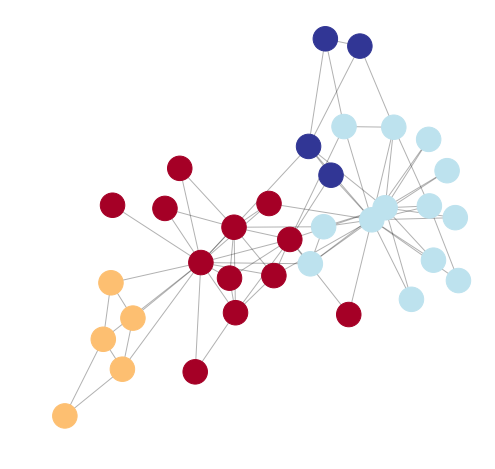

In [35]:
import community
partition = community.best_partition(G_karate)
pos = nx.spring_layout(G_karate)

plt.figure(figsize=(8, 8))
plt.axis('off')
nx.draw_networkx_nodes(G_karate, pos, node_size=600, cmap=plt.cm.RdYlBu, node_color=list(partition.values()))
nx.draw_networkx_edges(G_karate, pos, alpha=0.3)
plt.show(G_karate)

### 3.3 强互连的组分


强互连的组分（Strongly Connected Components /SCC）算法能找到有向图中的互连节点的分组。注意，在同一个分组中，每个节点都必须从任意其它节点从两个方向都到达。


这通常用在图分析过程的早期阶段，能让我们了解图构建的方式。举个例子，这能让我们探索财务报表数据，了解谁拥有什么公司的股份。


### 3.4 弱互连的组分（并查集）


弱互连的组分（Weakly Connected Components），也称为并查集（Union Find）算法，能找到有向图中的互连节点的集合，在同一个集合中，每个节点都可从任意其它节点到达。


这只需要节点对之间在一个方向上存在一条路径即可，而 SCC 则需要两个方向都存在路径。和 SCC 一样，并查集通常用在分析的早期阶段，以理解图的结构。


并查集是一个预处理步骤，为了理解图的结构，在任何算法之前都是必需的。

In [ ]:
nx.is_weakly_connected(G)
nx.is_strongly_connected(G)

In [39]:
nx.is_connected(G_karate)

True

### 3.5 分层聚类

在分层聚类（hierarchical clustering）中，我们构建聚类的层次结构。我们用树状图的形式表示聚类。

其思想是以不同的规模分析社群结构。我们通常自下而上构建树状图。我们从每个节点一个聚类开始，然后合并两个「最近」的节点。

In [52]:
n=34
pcc_longueurs=list(nx.all_pairs_shortest_path_length(G_karate))
distances=np.zeros((n,n))

# distances[i, j] is the length of the shortest path between i and j
for i in range(n):
    for j in range(n):
        distances[i, j] = pcc_longueurs[i][1][j]

In [55]:
from sklearn.cluster import AgglomerativeClustering

clustering = AgglomerativeClustering(n_clusters=2,linkage='average',affinity='precomputed').fit_predict(distances)

In [56]:
clustering

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

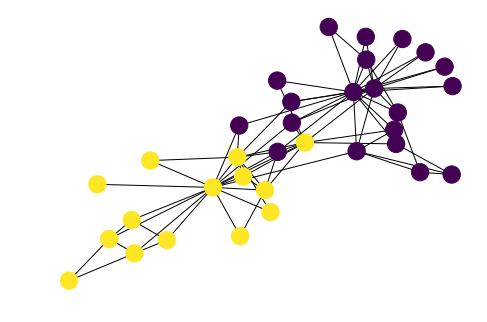

In [57]:
nx.draw(G_karate,  node_color = clustering)

### 3.6 聚类系数

聚类系数衡量的是两个节点倾向于聚类到一起的程度。

In [58]:
# List of local clustering coefficients
list(nx.clustering(G_barabasi).values())

[0.0989010989010989,
 0.031932773109243695,
 0.0367816091954023,
 0.08465608465608465,
 0.13333333333333333,
 0.052873563218390804,
 0.03694581280788178,
 0.056666666666666664,
 0.13333333333333333,
 0.027777777777777776,
 0.06666666666666667,
 0.045454545454545456,
 0.26666666666666666,
 0.014705882352941176,
 0.025,
 0.06666666666666667,
 0.02564102564102564,
 0.07142857142857142,
 0.17857142857142858,
 0.08333333333333333,
 0.06593406593406594,
 0.13333333333333333,
 0.08888888888888889,
 0.03557312252964427,
 0.06666666666666667,
 0.03571428571428571,
 0.047619047619047616,
 0.08888888888888889,
 0.047619047619047616,
 0.022222222222222223,
 0.01282051282051282,
 0.09523809523809523,
 0.16666666666666666,
 0.14285714285714285,
 0.6666666666666666,
 0.06666666666666667,
 0.3333333333333333,
 0.03636363636363636,
 0,
 0.16666666666666666,
 0.16666666666666666,
 0.10714285714285714,
 0.1,
 0.16666666666666666,
 0.2,
 0.047619047619047616,
 0.1,
 0.05555555555555555,
 0.027777777777777

In [59]:
# Global clustering coefficient
np.mean(list(nx.clustering(G_barabasi).values()))

0.09587628807329177

## 4、中心度算法

> 中心度（Centrality）衡量的是节点的重要程度。这并非一个明晰的定义，但如果我们想要确定重要的网页、交通网络中的瓶颈……，那这就会很有用。

游走（walk）是可以多次经过同一个节点的路径。根据所考虑的游走类型和统计它们的方式，中心度度量也会各有不同。

### 4.1 PageRank 算法


PageRank 是根据所连接的相邻节点，然后再根据它们各自的相邻节点估计当前节点的重要性。


尽管是谷歌让这种算法流行起来的，但这种方法能够用于检测任何网络中的高影响力节点。比如可用在社交网络上进行推荐。


PageRank 要么是通过在相邻节点上迭代地分配节点的秩（原本是基于度）来计算，要么是通过随机遍历图并统计每次游走期间到达每个节点的频率来计算。

In [60]:
nx.pagerank(G_karate, alpha=0.9)

{0: 0.09923208031303203,
 1: 0.0543403155825792,
 2: 0.05919704684187155,
 3: 0.036612460562853694,
 4: 0.02129205163493875,
 5: 0.028358863602879276,
 6: 0.028358863602879276,
 7: 0.024777139411941047,
 8: 0.030411546757834793,
 9: 0.013746095283556584,
 10: 0.02129205163493875,
 11: 0.008523220243546811,
 12: 0.014015169158033743,
 13: 0.030254309009995452,
 14: 0.013916466828162465,
 15: 0.013916466828162465,
 16: 0.015703158296594022,
 17: 0.01395744128254017,
 18: 0.013916466828162465,
 19: 0.019434610880594574,
 20: 0.013916466828162465,
 21: 0.01395744128254017,
 22: 0.013916466828162465,
 23: 0.03165330491466868,
 24: 0.02045532726885293,
 25: 0.020410702877569672,
 26: 0.014276670024478019,
 27: 0.025579985022944167,
 28: 0.01938173195115044,
 29: 0.02603805549234405,
 30: 0.024824588072166538,
 31: 0.037572665335286734,
 32: 0.07330616298815512,
 33: 0.10345460652842152}

### 4.2 度中心度

度中心度（Degree Centrality）统计的是终止于节点 i 的长度为 1 的游走的数量。

这能够衡量传入和传出关系。这能通过 C(Xi)=di 给出。度中心度可用于识别社交网络中最有影响力的人。

In [63]:
c_degree = nx.degree_centrality(G_karate)
c_degree = list(c_degree.values())
c_degree[:5]

[0.48484848484848486,
 0.2727272727272727,
 0.30303030303030304,
 0.18181818181818182,
 0.09090909090909091]

### 4.3 特征向量中心度

特征向量中心度（Eigenvector Centrality）是终止于节点 i 的长度为无穷的游走的数量。

这能让有很好连接相邻节点的节点有更高的重要度。

In [65]:
c_eigenvector = nx.eigenvector_centrality(G_karate)
c_eigenvector = list(c_eigenvector.values())
c_eigenvector[:5]

[0.3554834941851943,
 0.2659538704545025,
 0.31718938996844476,
 0.2111740783205706,
 0.07596645881657382]

### 4.4 接近度中心度 

接近度中心度（Closeness Centrality）检测的是可以在图中有效传播信息的节点。

这可用于识别假新闻账户或恐怖分子，以便隔离能向图中其它部分传播信息的个体。

In [67]:
c_closeness = nx.closeness_centrality(G_karate)
c_closeness = list(c_closeness.values())
c_closeness[:5]

[0.5689655172413793,
 0.4852941176470588,
 0.559322033898305,
 0.4647887323943662,
 0.3793103448275862]

### 4.5 居间性中心度

居间性中心度（Betweenness Centrality）检测的是节点在图中的信息流上所具有的影响量。

这通常可用于发现用作从图的一部分到另一部分的桥的节点，比如用在电信网络的数据包传递处理器或假新闻传播分析中。

In [68]:
c_betweenness = nx.betweenness_centrality(G_karate)
c_betweenness = list(c_betweenness.values())
c_betweenness[:5]

[0.43763528138528146,
 0.053936688311688304,
 0.14365680615680618,
 0.011909271284271283,
 0.0006313131313131313]

比较不同的中心度

Text(0.5,1,'Betweenness Centrality')

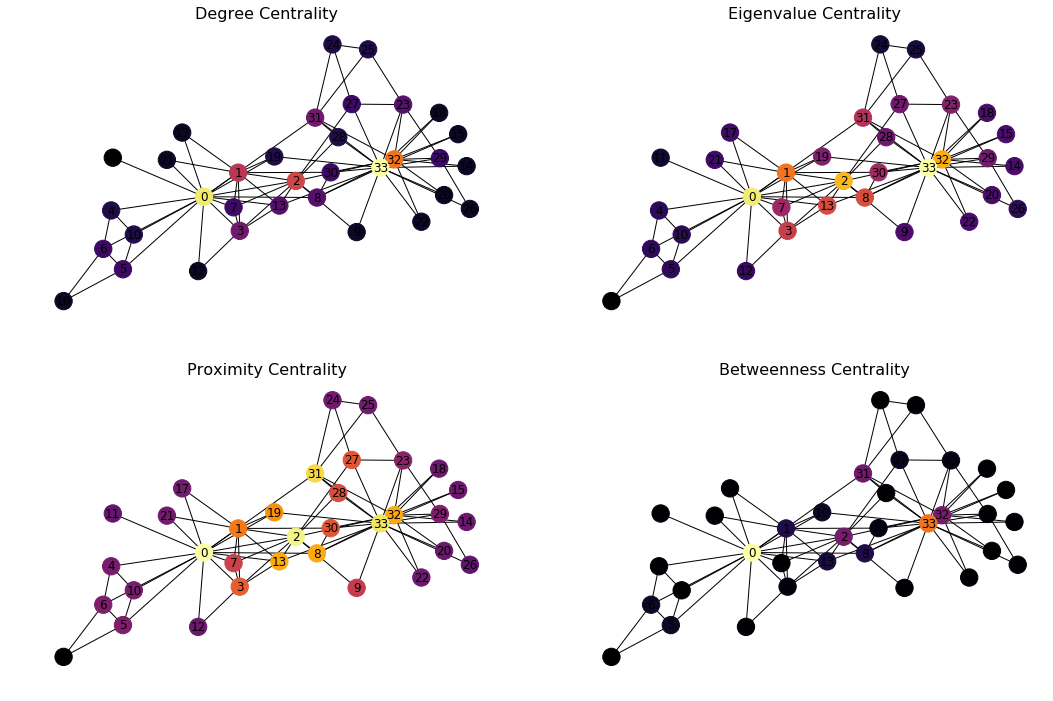

In [69]:
# Plot the centrality of the nodes
plt.figure(figsize=(18, 12))# Degree Centrality
f, axarr = plt.subplots(2, 2, num=1)
plt.sca(axarr[0,0])
nx.draw(G_karate, cmap = plt.get_cmap('inferno'), node_color = c_degree, node_size=300, pos=pos, with_labels=True)
axarr[0,0].set_title('Degree Centrality', size=16)# Eigenvalue Centrality

plt.sca(axarr[0,1])
nx.draw(G_karate, cmap = plt.get_cmap('inferno'), node_color = c_eigenvector, node_size=300, pos=pos, with_labels=True)
axarr[0,1].set_title('Eigenvalue Centrality', size=16)# Proximity Centrality

plt.sca(axarr[1,0])
nx.draw(G_karate, cmap = plt.get_cmap('inferno'), node_color = c_closeness, node_size=300, pos=pos, with_labels=True)
axarr[1,0].set_title('Proximity Centrality', size=16)# Betweenness Centrality

plt.sca(axarr[1,1])
nx.draw(G_karate, cmap = plt.get_cmap('inferno'), node_color = c_betweenness, node_size=300, pos=pos, with_labels=True)
axarr[1,1].set_title('Betweenness Centrality', size=16)

## 5、Graph Learning

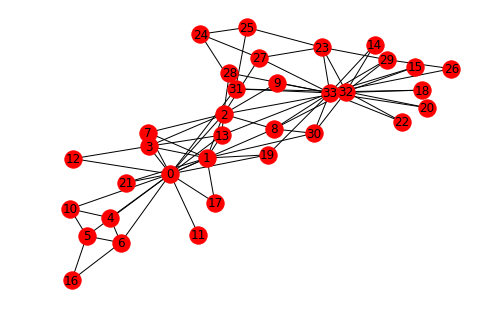

In [71]:
n=34
m = 78
G_karate = nx.karate_club_graph()

pos = nx.spring_layout(G_karate)
nx.draw(G_karate, cmap = plt.get_cmap('rainbow'), with_labels=True, pos=pos)

### There are two main tasks in graph learning :

- Link prediction
- Node labeling

### 5.1 Link prediction

In [72]:
n = G_karate.number_of_nodes()
m = G_karate.number_of_edges()
print("Number of nodes : %d" % n)
print("Number of edges : %d" % m)
print("Number of connected components : %d" % nx.number_connected_components(G_karate))

Number of nodes : 34
Number of edges : 78
Number of connected components : 1


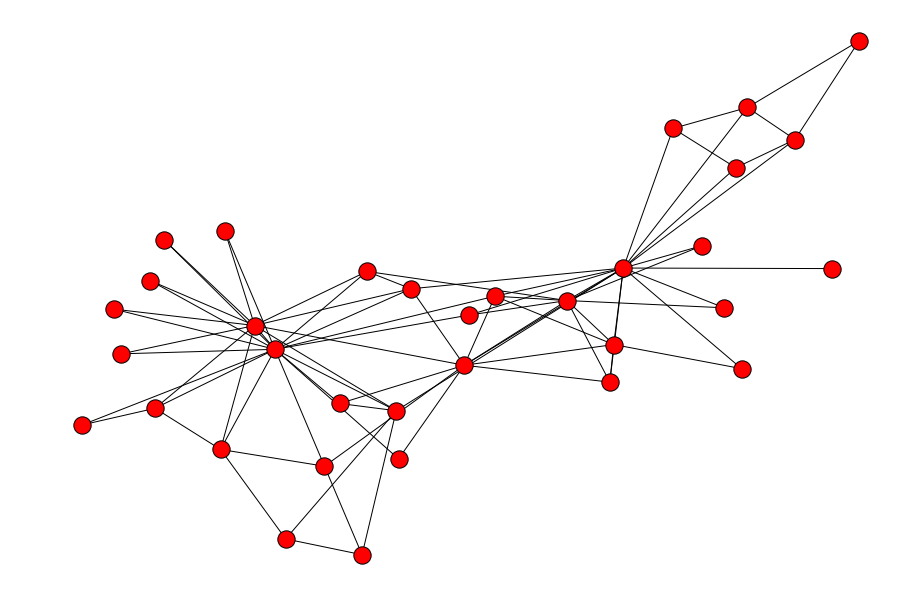

In [73]:
plt.figure(figsize=(12,8))
nx.draw(G_karate)
plt.gca().collections[0].set_edgecolor("#000000")

In [74]:
# Remove 20% of the edges
proportion_edges = 0.2
edge_subset = random.sample(G_karate.edges(), int(proportion_edges * G_karate.number_of_edges()))

# Create a copy of the graph and remove the edges
G_karate_train = G_karate.copy()
G_karate_train.remove_edges_from(edge_subset)

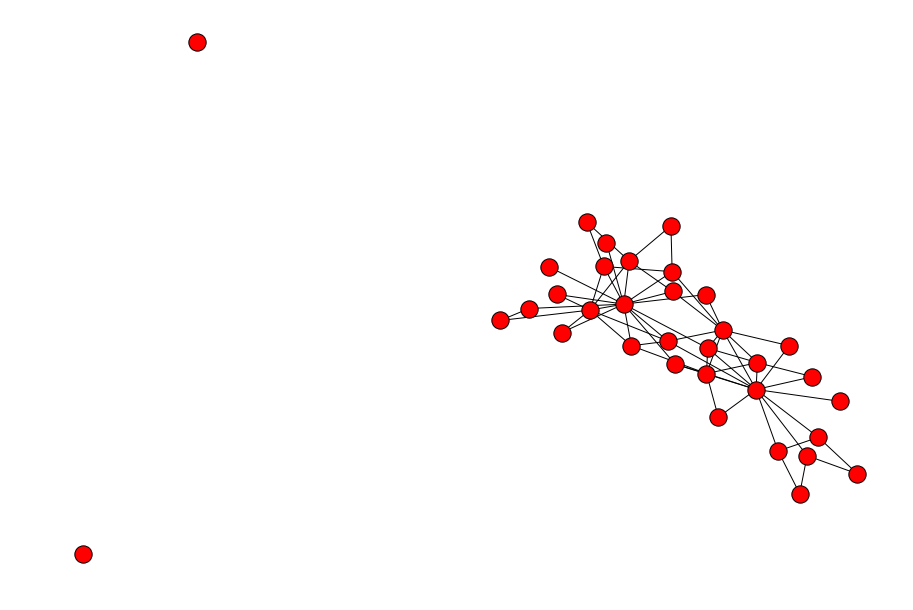

In [75]:
plt.figure(figsize=(12,8))
nx.draw(G_karate_train)
plt.gca().collections[0].set_edgecolor("#000000") # set node border color to black

In [76]:
edge_subset_size = len(list(edge_subset))
print("Number of edges deleted : %d" % edge_subset_size)
print("Number of edges remaining : %d" % (m - edge_subset_size))

Number of edges deleted : 15
Number of edges remaining : 63


- Jaccard Coefficient

In [77]:
# Make prediction using Jaccard Coefficient
pred_jaccard = list(nx.jaccard_coefficient(G_karate_train))
score_jaccard, label_jaccard = zip(*[(s, (u,v) in edge_subset) for (u,v,s) in pred_jaccard])

In [117]:
nx.neighbors(0, 10)

AttributeError: 'int' object has no attribute 'neighbors'

In [115]:
pred_jaccard

[(0, 32, 0.05),
 (0, 33, 0.12),
 (0, 9, 0.07142857142857142),
 (0, 10, 0.15384615384615385),
 (0, 14, 0.0),
 (0, 15, 0.0),
 (0, 16, 0.15384615384615385),
 (0, 18, 0.0),
 (0, 20, 0.0),
 (0, 21, 0.0),
 (0, 22, 0.0),
 (0, 23, 0.0),
 (0, 24, 0.0),
 (0, 25, 0.0),
 (0, 26, 0.0),
 (0, 27, 0.0625),
 (0, 28, 0.06666666666666667),
 (0, 29, 0.0),
 (0, 30, 0.13333333333333333),
 (0, 31, 0.0),
 (1, 4, 0.1111111111111111),
 (1, 5, 0.1111111111111111),
 (1, 6, 0.1111111111111111),
 (1, 7, 0.2857142857142857),
 (1, 8, 0.3333333333333333),
 (1, 9, 0.125),
 (1, 10, 0.0),
 (1, 11, 0.14285714285714285),
 (1, 12, 0.2857142857142857),
 (1, 14, 0.0),
 (1, 15, 0.0),
 (1, 16, 0.0),
 (1, 18, 0.0),
 (1, 20, 0.0),
 (1, 21, 0.0),
 (1, 22, 0.0),
 (1, 23, 0.0),
 (1, 24, 0.0),
 (1, 25, 0.0),
 (1, 26, 0.0),
 (1, 27, 0.1),
 (1, 28, 0.1111111111111111),
 (1, 29, 0.0),
 (1, 31, 0.0),
 (1, 32, 0.07142857142857142),
 (1, 33, 0.15789473684210525),
 (2, 4, 0.09090909090909091),
 (2, 5, 0.09090909090909091),
 (2, 6, 0.0909090

In [111]:
score_jaccard

(0.05,
 0.12,
 0.07142857142857142,
 0.15384615384615385,
 0.0,
 0.0,
 0.15384615384615385,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0625,
 0.06666666666666667,
 0.0,
 0.13333333333333333,
 0.0,
 0.1111111111111111,
 0.1111111111111111,
 0.1111111111111111,
 0.2857142857142857,
 0.3333333333333333,
 0.125,
 0.0,
 0.14285714285714285,
 0.2857142857142857,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.1,
 0.1111111111111111,
 0.0,
 0.0,
 0.07142857142857142,
 0.15789473684210525,
 0.09090909090909091,
 0.09090909090909091,
 0.09090909090909091,
 0.0,
 0.1111111111111111,
 0.2222222222222222,
 0.0,
 0.0,
 0.0,
 0.2222222222222222,
 0.0,
 0.2,
 0.0,
 0.0,
 0.0,
 0.08333333333333333,
 0.1,
 0.0,
 0.0,
 0.0,
 0.18181818181818182,
 0.07692307692307693,
 0.0625,
 0.2631578947368421,
 0.14285714285714285,
 0.14285714285714285,
 0.14285714285714285,
 0.4,
 0.25,
 0.16666666666666666,
 0.0,
 0.2,
 0.0,
 0.0,
 0.0,
 0.4,
 0.0,
 0.3333333333333333,
 0.0,
 0.0,
 0.0,

In [112]:
label_jaccard

(False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,


In [102]:
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score

In [90]:
# Compute the ROC AUC Score
fpr_jaccard, tpr_jaccard, _ = roc_curve(label_jaccard, score_jaccard)
auc_jaccard = roc_auc_score(label_jaccard, score_jaccard)
auc_jaccard

0.6093167701863353

- Adamic-Adar

In [91]:
# Prediction using Adamic Adar 
pred_adamic = list(nx.adamic_adar_index(G_karate_train))
score_adamic, label_adamic = zip(*[(s, (u,v) in edge_subset) for (u,v,s) in pred_adamic])

# Compute the ROC AUC Score
fpr_adamic, tpr_adamic, _ = roc_curve(label_adamic, score_adamic)
auc_adamic = roc_auc_score(label_adamic, score_adamic)
auc_adamic

0.6766045548654244

- Preferential Attachment

In [93]:
# Compute the Preferential Attachment
pred_pref = list(nx.preferential_attachment(G_karate_train))
score_pref, label_pref = zip(*[(s, (u,v) in edge_subset) for (u,v,s) in pred_pref])

fpr_pref, tpr_pref, _ = roc_curve(label_pref, score_pref)
auc_pref = roc_auc_score(label_pref, score_pref)
auc_pref

0.5459627329192547

- Plot the ROC AUC Curve

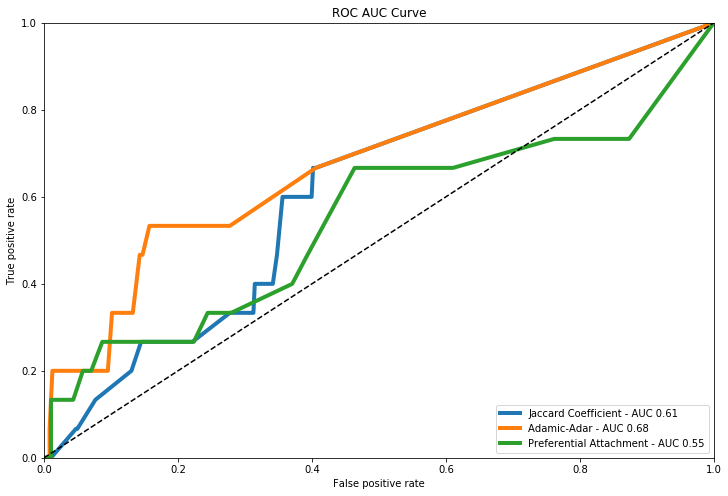

In [94]:
plt.figure(figsize=(12, 8))
plt.plot(fpr_jaccard, tpr_jaccard, label='Jaccard Coefficient - AUC %.2f' % auc_jaccard, linewidth=4)
plt.plot(fpr_adamic, tpr_adamic, label='Adamic-Adar - AUC %.2f' % auc_adamic, linewidth=4)
plt.plot(fpr_pref, tpr_pref, label='Preferential Attachment - AUC %.2f' % auc_pref, linewidth=4)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title("ROC AUC Curve")
plt.legend(loc='lower right')
plt.show()

### 5.2 Node Labeling

In [95]:
G_fb = nx.read_edgelist("./data/facebook/414.edges")
n = G_fb.number_of_nodes()
m = G_fb.number_of_edges()

print("Number of nodes: %d" % n)
print("Number of edges: %d" % m)
print("Number of connected components: %d" % nx.number_connected_components(G_fb))

Number of nodes: 150
Number of edges: 1693
Number of connected components: 2


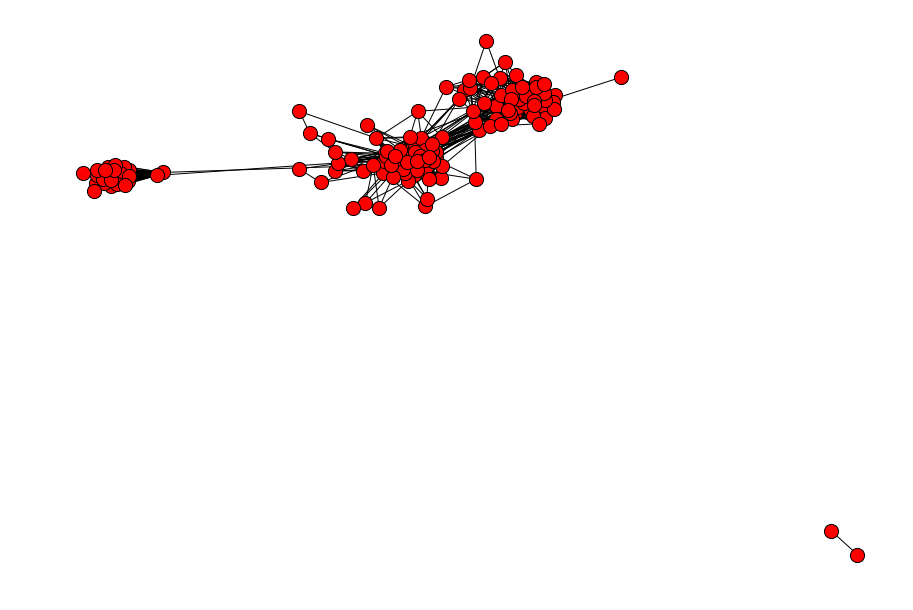

In [97]:
mapping=dict(zip(G_fb.nodes(), range(n)))
nx.relabel_nodes(G_fb, mapping, copy=False)
pos = nx.spring_layout(G_fb)

plt.figure(figsize=(12,8))
nx.draw(G_fb, node_size=200, pos=pos)
plt.gca().collections[0].set_edgecolor("#000000")

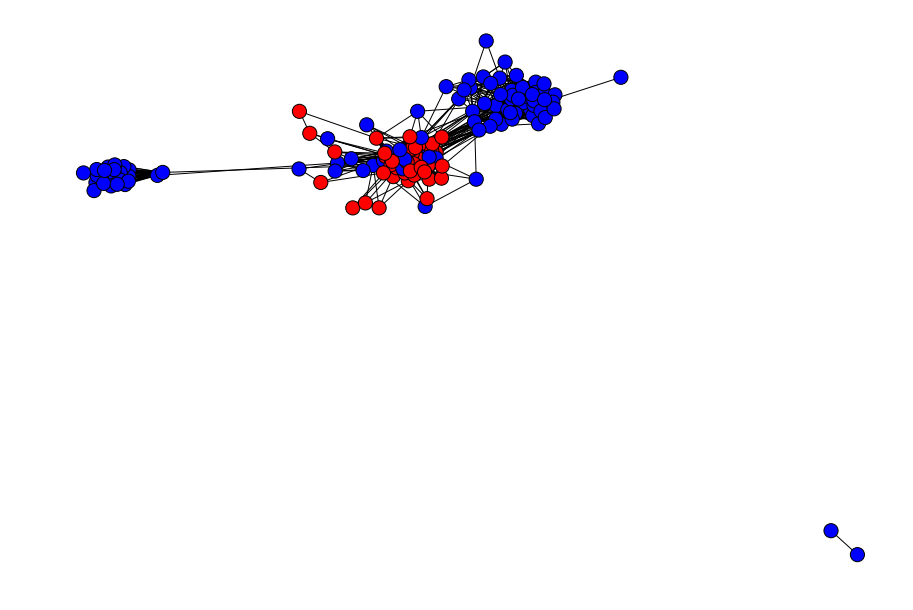

In [99]:
with open('./data/facebook/414.featnames') as f:
    for i, l in enumerate(f):
        pass

n_feat = i+1

features = np.zeros((n, n_feat))
f = open('./data/facebook/414.feat', 'r')

for line in f:
    if line.split()[0] in mapping:
        node_id = mapping[line.split()[0]]
        features[node_id, :] = list(map(int, line.split()[1:]))

features = 2*features-1
feat_id = 43
labels = features[:, feat_id]

plt.figure(figsize=(12,8))
nx.draw(G_fb, cmap = plt.get_cmap('bwr'), nodelist=range(n), node_color = labels, node_size=200, pos=pos)
plt.gca().collections[0].set_edgecolor("#000000")
plt.show()

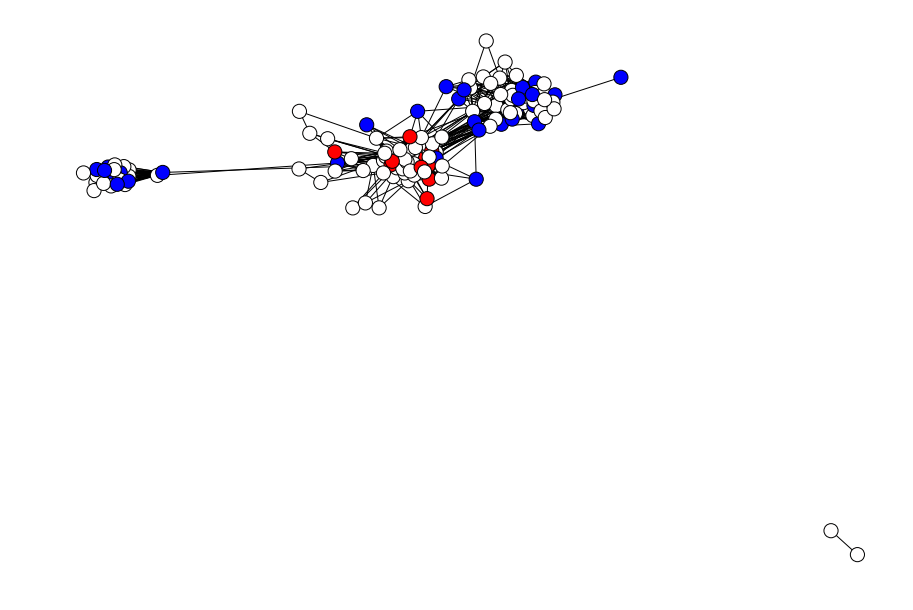

In [100]:
random.seed(5)
proportion_nodes = 0.3
labeled_nodes = random.sample(G_fb.nodes(), int(proportion_nodes * G_fb.number_of_nodes()))

known_labels = np.zeros(n)
known_labels[labeled_nodes] = labels[labeled_nodes]

plt.figure(figsize=(12,8))
nx.draw(G_fb, cmap = plt.get_cmap('bwr'), nodelist=range(n), node_color = known_labels, node_size=200, pos=pos)
plt.gca().collections[0].set_edgecolor("#000000") # set node border color to black
plt.show()

In [103]:
alpha = 0.7
L_sym = nx.normalized_laplacian_matrix(G_fb)

Y = np.zeros((n,2))
Y[known_labels==-1, 0] = 1
Y[known_labels==1, 1] = 1
I = np.identity(n)

# Create the F-pred matrix
F_pred = np.linalg.inv(I*(1-alpha) + L_sym) * Y
# Identify the prediction as the argmax
pred = np.array(np.argmax(F_pred, axis=1)*2-1).flatten()
# Compute the accuracy score
succ_rate = accuracy_score(labels, pred)

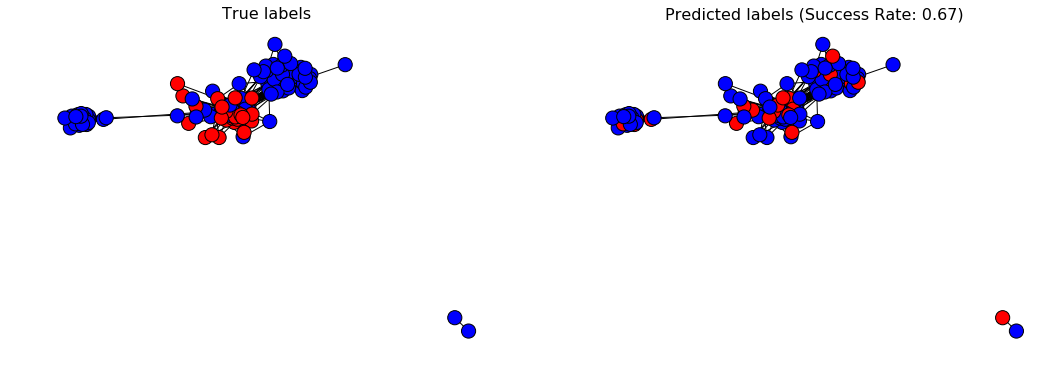

In [104]:
plt.figure(figsize=(18, 6))
f, axarr = plt.subplots(1, 2, num=1)

# Plot true values
plt.sca(axarr[0])
nx.draw(G_fb, cmap = plt.get_cmap('bwr'), nodelist=range(n), node_color = labels, node_size=200, pos=pos)
axarr[0].set_title('True labels', size=16)
plt.gca().collections[0].set_edgecolor("#000000")

# Plot predicted values
plt.sca(axarr[1])
nx.draw(G_fb, cmap = plt.get_cmap('bwr'), nodelist=range(n), node_color = pred, node_size=200, pos=pos)
axarr[1].set_title('Predicted labels (Success Rate: %.2f)' % succ_rate, size=16)
plt.gca().collections[0].set_edgecolor("#000000")

## 6、Graph Embedding